In [1]:
import pandas as pd
import numpy as np
import fyp_functions as fyp
import matplotlib.pyplot as plt
import itertools
pd.options.display.float_format = "{:,.3f}".format

In [2]:
IMM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='IMM', 
                                          metrics=['mean'])
WMPM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='WMPM', 
                                          metrics=['mean'])

df = pd.merge(IMM, WMPM, left_index=True, right_index=True, suffixes=('_IMM', '_WMPM'))
df.drop(columns=['profile_WMPM'],inplace=True)
df.rename(columns={'mean_IMM':'dist_mean_IMM','mean_WMPM':'dist_mean_WMPM','profile_IMM':'profile'},inplace=True)
df['mean_vote'] = df['profile'].apply(lambda x: np.round(np.mean(x, axis=0),3))
df['dist_mean_IMM'] = df['dist_mean_IMM'].apply(lambda x: np.round(x,3))
df['dist_mean_WMPM'] = df['dist_mean_WMPM'].apply(lambda x: np.round(x,3))
df

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]"
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]"
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]"
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]"
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]"
...,...,...,...,...,...,...
1326,"[[1.0, 0.0], [1.0, 0.0], [0.6, 0.4]]","[0.667, 0.333]",0.400,"[1.0, 0.0]",0.267,"[0.867, 0.133]"
1327,"[[1.0, 0.0], [1.0, 0.0], [0.7, 0.3]]","[0.7, 0.3]",0.400,"[1.0, 0.0]",0.200,"[0.9, 0.1]"
1328,"[[1.0, 0.0], [1.0, 0.0], [0.8, 0.2]]","[0.8, 0.2]",0.267,"[1.0, 0.0]",0.133,"[0.933, 0.067]"
1329,"[[1.0, 0.0], [1.0, 0.0], [0.9, 0.1]]","[0.9, 0.1]",0.133,"[1.0, 0.0]",0.067,"[0.967, 0.033]"


if (what condition):
    this profile belongs to which figure 

max value as iterating over alphas

In [3]:
def get_min_max(P):
    
    df = fyp.iterate_over_alphas(P, np.linspace(0, 1, 10), disutility_type='mean')

    return np.round((max(df['disutility']) , min(df['disutility'])),3)

df[['max_fairness', 'min_fairness']] = df['profile'].apply(
    lambda p: pd.Series(get_min_max(p))
)

In [4]:
def check_status(df,row):
    if df.loc[row,'dist_mean_IMM'] == df.loc[row,'dist_mean_WMPM']:
        return 'Equal'
    
    elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'dist_mean_WMPM']): 
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'max_fairness']) & (df.loc[row,'dist_mean_WMPM'] == df.loc[row,'min_fairness']) :
            return 'No Tradeoff'
        elif (df.loc[row,'dist_mean_WMPM'] < df.loc[row,'max_fairness']):
            return 'Bend 2'    
    
    elif (df.loc[row,'dist_mean_IMM'] < df.loc[row,'dist_mean_WMPM']):
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'min_fairness']):
            return 'Standard Tradeoff'
        elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'min_fairness']):
            return 'Bend 1'

        

for i in range(len(df)):
    df.loc[i,'status']= check_status(df,i)

In [5]:
df.head(20)

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,max_fairness,min_fairness,status
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,0.000,Equal
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]",0.133,0.000,Bend 2
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]",0.267,0.000,Bend 2
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]",0.400,0.000,Bend 2
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]",0.400,0.030,Bend 2
5,"[[0.0, 1.0], [0.0, 1.0], [0.5, 0.5]]","[0.333, 0.667]",0.333,"[0.0, 1.0]",0.333,"[0.167, 0.833]",0.333,0.037,Equal
6,"[[0.0, 1.0], [0.0, 1.0], [0.6, 0.4]]","[0.333, 0.667]",0.267,"[0.0, 1.0]",0.400,"[0.2, 0.8]",0.400,0.030,Bend 1
7,"[[0.0, 1.0], [0.0, 1.0], [0.7, 0.3]]","[0.333, 0.667]",0.200,"[0.0, 1.0]",0.467,"[0.233, 0.767]",0.467,0.022,Bend 1
8,"[[0.0, 1.0], [0.0, 1.0], [0.8, 0.2]]","[0.333, 0.667]",0.133,"[0.0, 1.0]",0.533,"[0.267, 0.733]",0.533,0.015,Bend 1
9,"[[0.0, 1.0], [0.0, 1.0], [0.9, 0.1]]","[0.333, 0.667]",0.067,"[0.0, 1.0]",0.600,"[0.3, 0.7]",0.600,0.007,Bend 1


In [6]:
df['status'].value_counts()

status
Equal                611
Standard Tradeoff    384
No Tradeoff          120
Bend 1               108
Bend 2               108
Name: count, dtype: int64

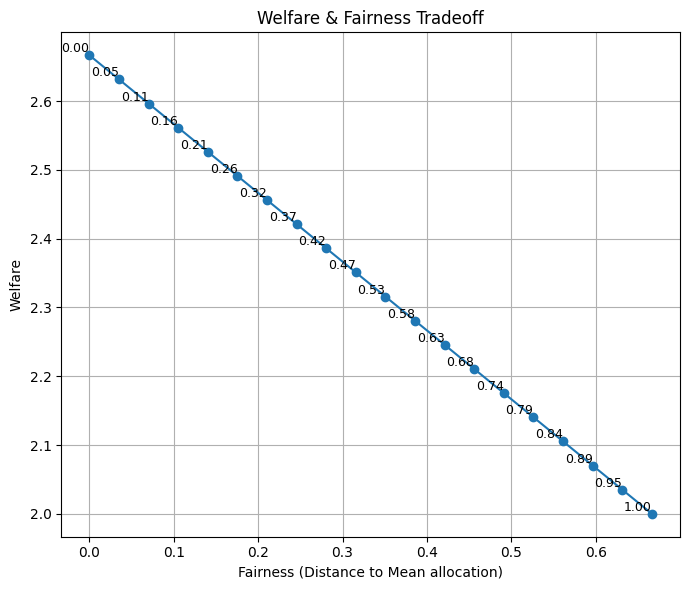

,alpha,allocation_x,Welfare,Fairness
0,0.000,"[0.3333333358168602, 0.6666666716337204]",2.667,0.000
1,0.053,"[0.31578947603702545, 0.6842105310214193]",2.632,0.035
2,0.105,"[0.2982456162571907, 0.7017543904091182]",2.596,0.070
3,0.158,"[0.28070175647735596, 0.7192982497968172]",2.561,0.105
4,0.211,"[0.2631578966975212, 0.7368421091845161]",2.526,0.140
5,0.263,"[0.2456140369176865, 0.7543859685722151]",2.491,0.175
6,0.316,"[0.22807017713785172, 0.7719298279599139]",2.456,0.211
7,0.368,"[0.21052631735801697, 0.7894736873476129]",2.421,0.246
8,0.421,"[0.19298245757818222, 0.8070175467353118]",2.386,0.281
9,0.474,"[0.1754385977983475, 0.8245614061230108]",2.351,0.316


In [ ]:
p = np.array(	[[0.0, 1.0], [0.0, 1.0], [1.0, 0.0]]	)
fyp.plot_tradeoff_with_alpha(p,20)

In [8]:
import plotly.express as px

# Extract x, y, z the same way:
df['x'] = df['profile'].apply(lambda p: p[0][0])  # x
df['y'] = df['profile'].apply(lambda p: p[1][0])  # y
df['z'] = df['profile'].apply(lambda p: p[2][0])  # z

# Plotly scatter 3D
fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color='status',  # color points by status
    title='3D Profile Scatter by Status'
)

fig.show()

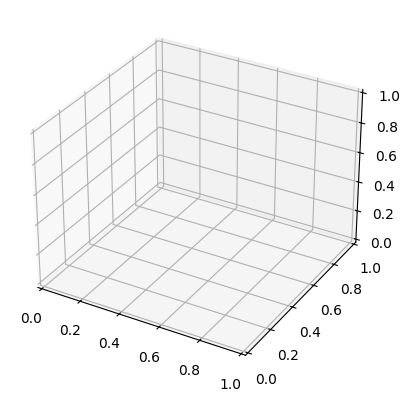

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [10]:
df.head(15)

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,max_fairness,min_fairness,status,x,y,z
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,0.000,Equal,0.000,0.000,0.000
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]",0.133,0.000,Bend 2,0.000,0.000,0.100
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]",0.267,0.000,Bend 2,0.000,0.000,0.200
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]",0.400,0.000,Bend 2,0.000,0.000,0.300
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]",0.400,0.030,Bend 2,0.000,0.000,0.400
5,"[[0.0, 1.0], [0.0, 1.0], [0.5, 0.5]]","[0.333, 0.667]",0.333,"[0.0, 1.0]",0.333,"[0.167, 0.833]",0.333,0.037,Equal,0.000,0.000,0.500
6,"[[0.0, 1.0], [0.0, 1.0], [0.6, 0.4]]","[0.333, 0.667]",0.267,"[0.0, 1.0]",0.400,"[0.2, 0.8]",0.400,0.030,Bend 1,0.000,0.000,0.600
7,"[[0.0, 1.0], [0.0, 1.0], [0.7, 0.3]]","[0.333, 0.667]",0.200,"[0.0, 1.0]",0.467,"[0.233, 0.767]",0.467,0.022,Bend 1,0.000,0.000,0.700
8,"[[0.0, 1.0], [0.0, 1.0], [0.8, 0.2]]","[0.333, 0.667]",0.133,"[0.0, 1.0]",0.533,"[0.267, 0.733]",0.533,0.015,Bend 1,0.000,0.000,0.800
9,"[[0.0, 1.0], [0.0, 1.0], [0.9, 0.1]]","[0.333, 0.667]",0.067,"[0.0, 1.0]",0.600,"[0.3, 0.7]",0.600,0.007,Bend 1,0.000,0.000,0.900
